In [44]:
import keras 
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score
import ipywidgets as widgets
import io 
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2 
from sklearn.utils import shuffle
import tensorflow as tf 
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [16]:
X_train = []
Y_train = []
imgae_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join(r'C:\Users\SunInternet.ir\Desktop\New Ali\Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(imgae_size,imgae_size))
        X_train.append(img)
        Y_train.append(i)
        
        
for i in labels:
    folderPath = os.path.join(r'C:\Users\SunInternet.ir\Desktop\New Ali\Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(imgae_size,imgae_size))
        X_train.append(img)
        Y_train.append(i)
        
        
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [17]:
X_train,Y_train = shuffle(X_train,Y_train,random_state = 101)
X_train.shape

(3264, 150, 150, 3)

In [22]:
X_train,X_test,Y_train,Y_test = train_test_split(X_train,Y_train,test_size= 0.1,random_state = 101)

In [28]:
import os
import cv2
import numpy as np
import tensorflow as tf

X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

def process_images_from_directory(base_path, label, X_train, Y_train):
    folder_path = os.path.join(base_path, label)
    if not os.path.exists(folder_path):
        print(f"Directory does not exist: {folder_path}")
        return
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        try:
            img = cv2.imread(file_path)
            if img is not None:
                img = cv2.resize(img, (image_size, image_size))
                X_train.append(img)
                Y_train.append(label)
            else:
                print(f"Unable to read image: {file_path}")
        except Exception as e:
            print(f"Error processing file {file_path}: {e}")

base_paths = [r'C:\Users\SunInternet.ir\Desktop\New Ali\Testing', 
              r'C:\Users\SunInternet.ir\Desktop\New Ali\Training']

for base_path in base_paths:
    for label in labels:
        process_images_from_directory(base_path, label, X_train, Y_train)

# Convert lists to numpy arrays
X_train = np.array(X_train)
print(f"Shape of X_train: {X_train.shape}")

# Verify the first few elements of Y_train
print("First few elements of Y_train:", Y_train[:5])

# Ensure Y_train contains labels as strings and convert them to indices
Y_train_new = []
for i in Y_train:
    if isinstance(i, str):
        Y_train_new.append(labels.index(i))
    else:
        print(f"Unexpected label format: {i}")

# Check if Y_train_new is populated correctly
if not Y_train_new:
    raise ValueError("Y_train_new is empty. Please check the format of Y_train.")

# Convert to numpy array and then to one-hot encoding
Y_train = np.array(Y_train_new)
Y_train = tf.keras.utils.to_categorical(Y_train)

print(f"Processed {len(Y_train)} training labels.")


Unable to read image: C:\Users\SunInternet.ir\Desktop\New Ali\Training\meningioma_tumor\m1(13).jpg
Unable to read image: C:\Users\SunInternet.ir\Desktop\New Ali\Training\meningioma_tumor\m1(187).jpg
Unable to read image: C:\Users\SunInternet.ir\Desktop\New Ali\Training\meningioma_tumor\m1(201).jpg
Unable to read image: C:\Users\SunInternet.ir\Desktop\New Ali\Training\meningioma_tumor\m1(6).jpg
Unable to read image: C:\Users\SunInternet.ir\Desktop\New Ali\Training\meningioma_tumor\m1(9).jpg
Unable to read image: C:\Users\SunInternet.ir\Desktop\New Ali\Training\meningioma_tumor\m3 (130).jpg
Unable to read image: C:\Users\SunInternet.ir\Desktop\New Ali\Training\no_tumor\image (22).jpg
Unable to read image: C:\Users\SunInternet.ir\Desktop\New Ali\Training\no_tumor\image (7).jpg
Shape of X_train: (3256, 150, 150, 3)
First few elements of Y_train: ['glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor']
Processed 3256 training labels.


In [37]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape = (150,150,3)))
model.add(Conv2D(64,(3,3),activation = 'relu',))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0,3))
model.add(Conv2D(64,(3,3),activation = 'relu',))
model.add(Conv2D(64,(3,3),activation = 'relu',))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0,3))
model.add(Conv2D(128,(3,3),activation = 'relu',))
model.add(Conv2D(128,(3,3),activation = 'relu',))
model.add(Conv2D(128,(3,3),activation = 'relu',))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0,3))
model.add(Conv2D(128,(3,3),activation = 'relu',))
model.add(Conv2D(256,(3,3),activation = 'relu',))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0,3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0,3))
model.add(Dense(4,activation = 'softmax'))


In [39]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_28 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 146, 146, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 71, 71, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 69, 69, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 30, 30, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 512)            │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,447,044 (16.96 MB)

 Trainable params: 4,447,044 (16.96 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
model.compile(loss = 'catogorical_crossentropy',optimizer = 'Adam',metrics = ['accuracy'])

In [43]:
# Example model compilation
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, Y_train, epochs=20, validation_split=0.1)


Epoch 1/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 387s 4s/step - accuracy: 0.3629 - loss: 2.3243 - val_accuracy: 0.4049 - val_loss: 1.1072
Epoch 2/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 404s 4s/step - accuracy: 0.5297 - loss: 1.0098 - val_accuracy: 0.3528 - val_loss: 1.4660
Epoch 3/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 288s 3s/step - accuracy: 0.6666 - loss: 0.7495 - val_accuracy: 0.4294 - val_loss: 1.1966
Epoch 4/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 285s 3s/step - accuracy: 0.8038 - loss: 0.5159 - val_accuracy: 0.8344 - val_loss: 0.4025
Epoch 5/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 319s 3s/step - accuracy: 0.8457 - loss: 0.4208 - val_accuracy: 0.4141 - val_loss: 2.6257
Epoch 6/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 294s 3s/step - accuracy: 0.8877 - loss: 0.2936 - val_accuracy: 0.5460 - val_loss: 1.2528
Epoch 7/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 321s 3s/step - accuracy: 0.9344 - loss: 0.1921 - val_accuracy: 0.8160 - val_loss: 0.6197
Epoch 8/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 308s 3s/step - accuracy: 0.9367 - loss: 0.1797 - val_accuracy: 0.8834 - v

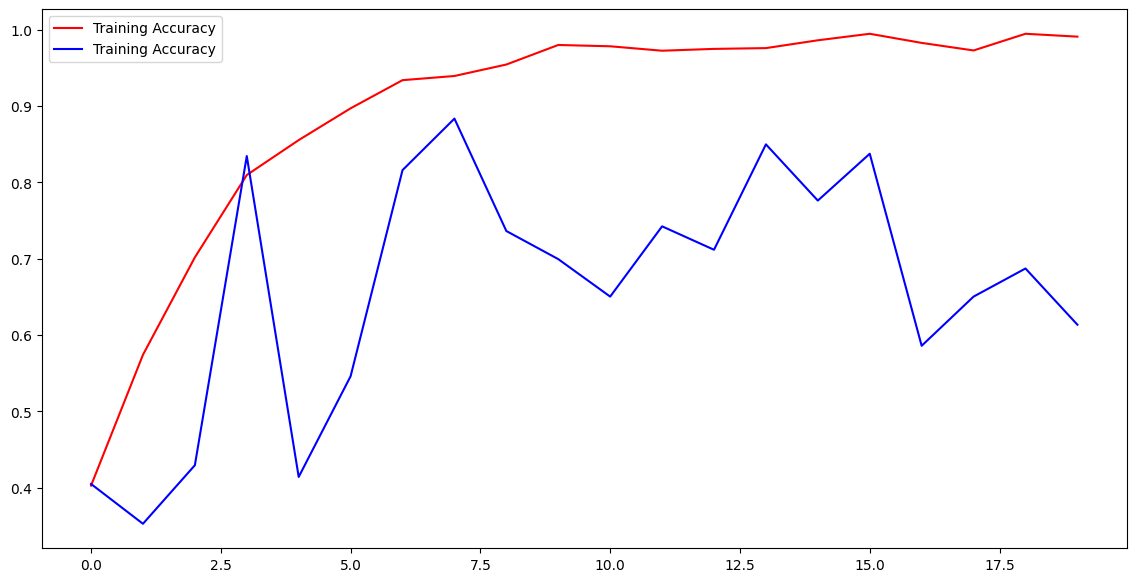

In [47]:
model.save('braintumor.h5')
acc = history.history['accuracy']

val_acc = history.history['val_accuracy']

epochs = range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label ='Training Accuracy')
plt.plot(epochs,val_acc,'b',label ='Training Accuracy')
plt.legend(loc = 'upper left')
plt.show()

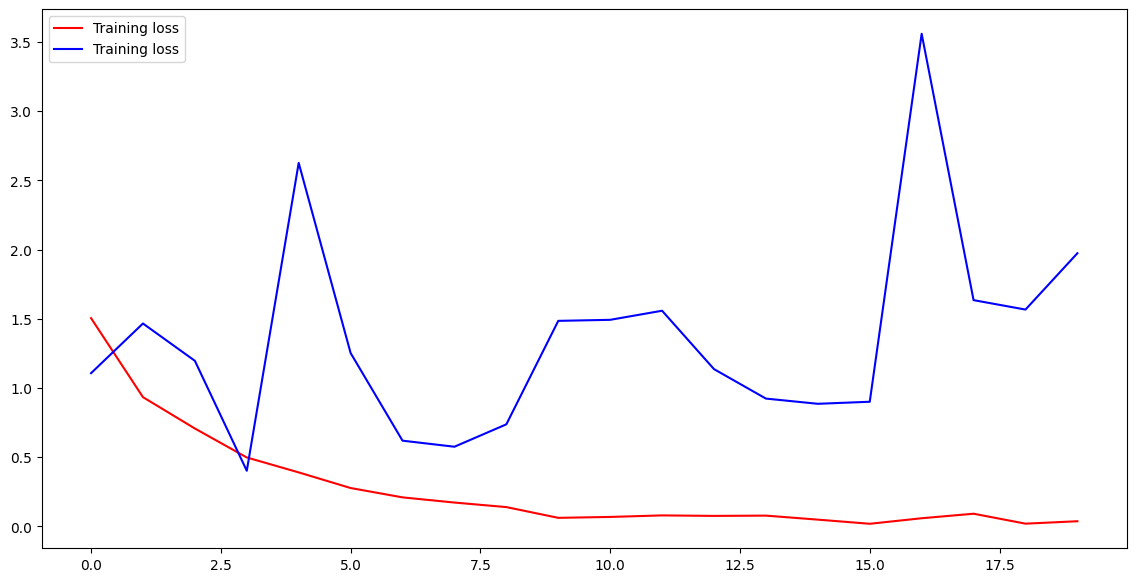

In [48]:
loss = history.history['loss']

val_loss = history.history['val_loss']

epochs = range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label ='Training loss')
plt.plot(epochs,val_loss,'b',label ='Training loss')
plt.legend(loc = 'upper left')
plt.show()

In [49]:
img = cv2.imread(r'C:\Users\SunInternet.ir\Desktop\New Ali\Training\no_tumor\image (23).jpg')

img = cv2.resize(img,(150,150))
img_array = np.array(img)

img_array.shape


(150, 150, 3)

In [50]:
img_array = img_array.reshape(1,150,150,3)

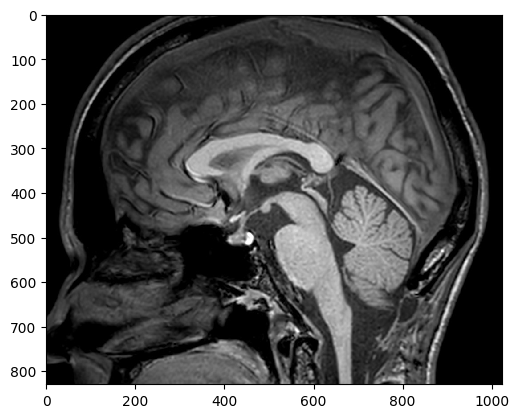

In [54]:
from tensorflow.keras.preprocessing import image
img = image.load_img(r'C:\Users\SunInternet.ir\Desktop\New Ali\Training\no_tumor\image (23).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()
    

In [55]:
a = model.predict(img_array)
indices = a.argmax()
indices

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 610ms/step


2